In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [2]:
boston=load_boston()
bos = pd.DataFrame(boston.data)

In [3]:
bos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
bos.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [6]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
bos.columns = boston.feature_names

In [8]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
bos['Price'] = pd.DataFrame(boston.target)

In [10]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
## Lets replace 0 with na
bos.replace(0,np.nan,inplace=True)

In [13]:
bos.isnull().sum()/len(bos)

CRIM       0.000000
ZN         0.735178
INDUS      0.000000
CHAS       0.930830
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
Price      0.000000
dtype: float64

In [14]:
## Lets drop ZN and CHAS columns as it has more null values
bos=bos.drop('ZN',axis=1)
bos=bos.drop('CHAS',axis=1)

In [15]:
bos.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


C:\Users\vivek\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Relationship between CRIM and Price')

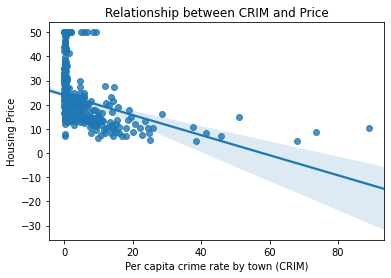

In [16]:
##Lets look at the relationship
sns.regplot(bos.CRIM,bos.Price)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
### As crime rate increases price decreases

Text(0.5, 1.0, 'Relationship between RM and Price')

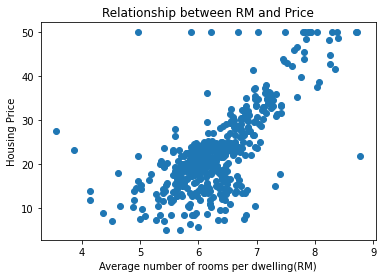

In [17]:
plt.scatter(bos.RM, bos.Price)
plt.xlabel("Average number of rooms per dwelling(RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

### Increase of RM leads to Price increase

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

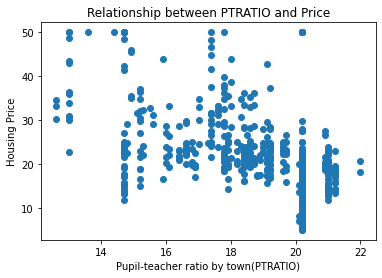

In [18]:
##scatter plot between *PTRATIO* and *PRICE*

plt.scatter(bos.PTRATIO, bos.Price)
plt.xlabel("Pupil-teacher ratio by town(PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

<IPython.core.display.Javascript object>

<AxesSubplot:>

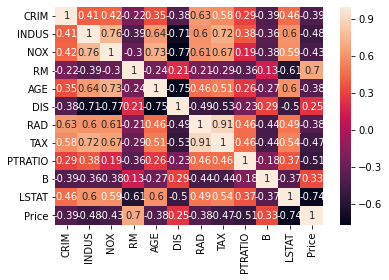

In [19]:
## lets check correlation matrix

correlation_matrix = bos.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
##RM has most postive correlated to Price and LSTAT is most highly negatively correlated to Price

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='RM', ylabel='Price'>

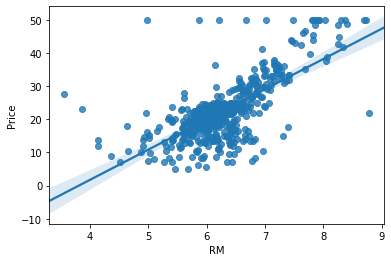

In [21]:
sns.regplot(y="Price", x="RM", data=bos, fit_reg = True)

C:\Users\vivek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  


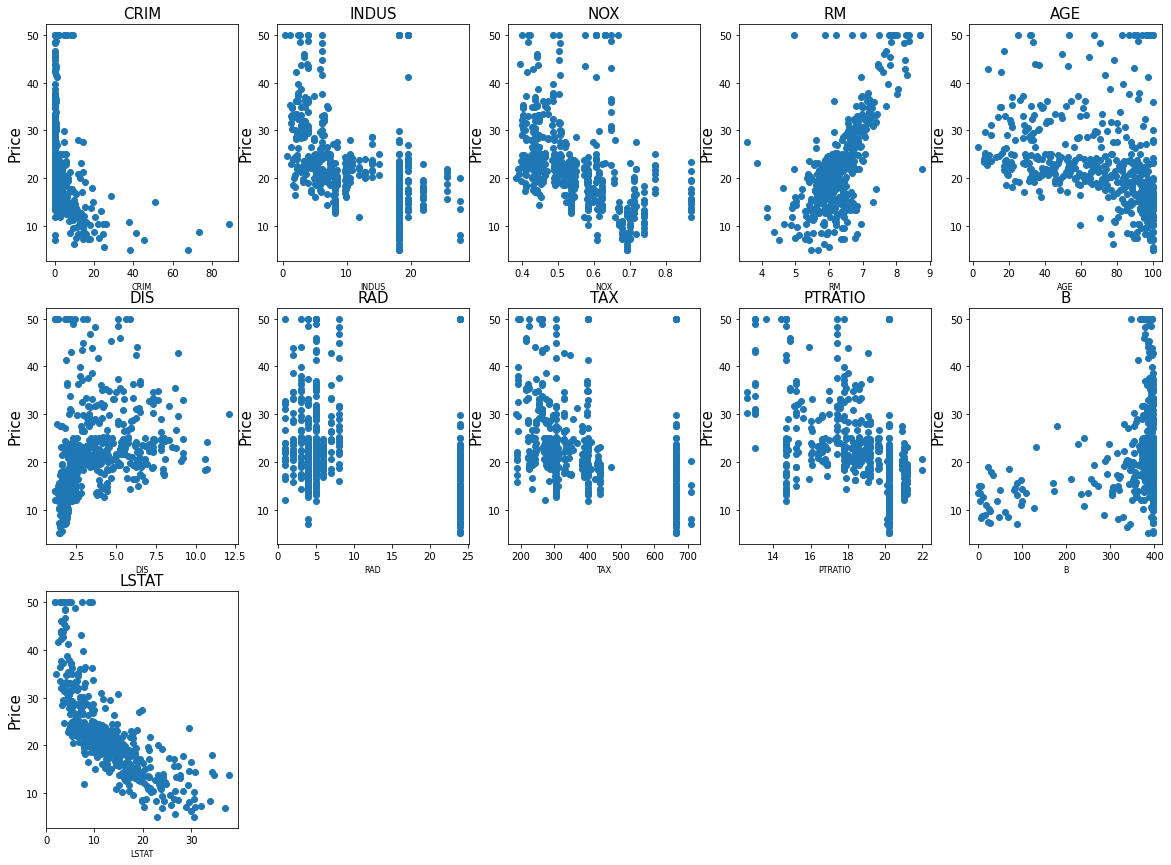

In [23]:
features = bos.drop('Price', 1).columns
target = bos['Price']
plt.figure(figsize=(20,20))
for index, feature_name in enumerate(features):
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(bos[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8) 
    plt.ylabel('Price', fontsize=15)
    
### RM and LSTAT have more linear relationship with the Price.

In [24]:
bos.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
X = bos[['LSTAT','RM']]
Y = bos['Price']

In [31]:
X.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=7)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
lr.score(X_train,Y_train)

0.6735692161705211

In [55]:
y_pred = lr.predict(X_test)

In [56]:
y_pred

array([23.00723049, 21.42578129, 21.349834  , 23.03218613, 16.23756902,
       12.96049189, 22.07259458, 25.47889388, 27.12196377, 18.12814325,
        4.0617393 , 31.56738981, 20.0840226 , 20.7215276 , 35.16070206,
       22.66256972, 26.29672731, 31.28227271, 12.26857449, 22.21707629,
       20.56022655, 30.81339002, 36.12229214, 15.26385379,  4.9488355 ,
       18.4601896 , 33.09063907, 29.2264135 , 25.03790485, 26.13708918,
       21.61019018, 29.92806805, 31.41506307, 21.11749593, 35.23164089,
       18.62063456, 18.8430588 , 22.88030469, 21.56797812, 27.14810125,
       25.61241259, 19.05234815, 15.23356394, 28.48735899, 20.27990841,
       16.92910024, 25.18552424, 21.59503704, 20.54036607,  7.36666082,
       27.21234242, 25.75062715, 20.82431609, 42.12711694, 20.76729471,
       22.34641964, 18.74987151, 21.88840504, 23.40756891, 19.83431679,
       19.9391071 , 29.87062109, 19.04239491, 22.57897542, 20.57504244,
       38.86319935, 22.13685216, 24.05594694, 23.90935866, 29.32

In [61]:
# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((y_pred - Y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(X_test, Y_test))

Coefficients: 
 [-0.55371597  6.16403899]
Mean squared error: 43.02
Variance score: 0.47


In [63]:

# The mean squared error
print("Mean squared error with test data: %.2f"
      % np.mean((y_pred - Y_test) ** 2))
y_pred1 = lr.predict(X_train)

print("Mean squared error with train data: %.2f"
      % np.mean((y_pred1 - Y_train) ** 2))

Mean squared error with test data: 43.02
Mean squared error with train data: 27.85
